## Steps to follow:

1. Import the data
2. Explore the data and identify things that would be worth exploring
3. Write two functions to make two different kinds of plots using matplotlib and seaborn (one each)
4. It might be a good idea to look at one of the categorical variables (gender, race/ethinicity) and the test scores 
5. Push your work back and send me a link to the repo!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-notebook')

In [3]:
data = pd.read_csv('StudentsPerformance.csv')

In [59]:
data.head()

,gender,group,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Don't like that the second column has a '/' in the name, so renaming:

In [6]:
data.rename( columns = { 'race/ethnicity' : 'group' }, inplace = True )

Similarly, don't like spaces in the column names, so I will replace with '_':

In [7]:
data.columns = data.columns.map( lambda column: column.replace(" ", "_") )

In [8]:
data.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [9]:
data.group.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: group, dtype: int64

In [10]:
data.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [11]:
data.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [12]:
data.test_preparation_course.value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

In [13]:
data.math_score.value_counts()

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math_score, Length: 81, dtype: int64

In [14]:
data.writing_score.value_counts()

74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19     1
15     1
10     1
Name: writing_score, Length: 77, dtype: int64

In [15]:
data.reading_score.value_counts()

72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading_score, Length: 72, dtype: int64

Based on the above, it seems that the data set is complete and there are no anomalous values.

array([[<AxesSubplot:xlabel='math_score', ylabel='math_score'>,
        <AxesSubplot:xlabel='reading_score', ylabel='math_score'>,
        <AxesSubplot:xlabel='writing_score', ylabel='math_score'>],
       [<AxesSubplot:xlabel='math_score', ylabel='reading_score'>,
        <AxesSubplot:xlabel='reading_score', ylabel='reading_score'>,
        <AxesSubplot:xlabel='writing_score', ylabel='reading_score'>],
       [<AxesSubplot:xlabel='math_score', ylabel='writing_score'>,
        <AxesSubplot:xlabel='reading_score', ylabel='writing_score'>,
        <AxesSubplot:xlabel='writing_score', ylabel='writing_score'>]],
      dtype=object)

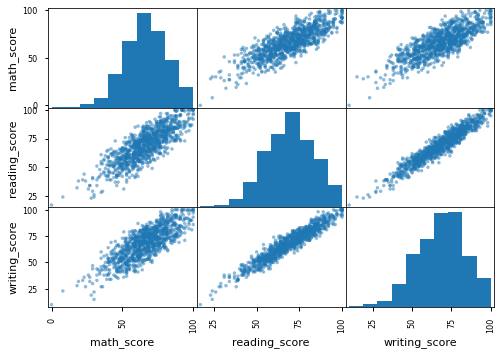

In [16]:
pd.plotting.scatter_matrix(data)

From here, it looks like the different score types track with each other pretty well, indicating that if someone performs well on one section they will perform similarly well on the other sections. We can notice that the reading and writing scores have a stronger relationship, which makes sense, even without quantifying it. Likewise, the score distributions are fairly standard. It will probably be more interesting to observe the score variables with respect to the non-numeric columns.

In [17]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


While there are some visual differences in the score distributions, they are really very similar. Going forward, let's look at distributions for different groupings of the categorical variables.

In [18]:
data.groupby(['gender','group']).mean()

math_score  reading_score  writing_score
gender group                                            
female group A   58.527778      69.000000      67.861111
       group B   61.403846      71.076923      70.048077
       group C   62.033333      71.944444      71.777778
       group D   65.248062      74.046512      75.023256
       group E   70.811594      75.840580      75.536232
male   group A   63.735849      61.735849      59.150943
       group B   65.930233      62.848837      60.220930
       group C   67.611511      65.424460      62.712230
       group D   69.413534      66.135338      65.413534
       group E   76.746479      70.295775      67.394366

From here, we can notice that independent of group, women tend to score higher on reading and writing and lower on math compared to their male counterparts. More interestingly, we notice that group A performs the worst across the board in either gender category, with scores improving as you increase in group designation. This is a notable result that we can display and then investigate further.

In [19]:
data.groupby(['parental_level_of_education']).mean()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


This suggests that there is a correlation between parental education and test score. However, if you groupby parental education and group:

In [20]:
data.groupby(['parental_level_of_education','group']).mean()

math_score  reading_score  writing_score
parental_level_of_education group                                            
associate's degree          group A   61.000000      67.071429      63.571429
                            group B   66.097561      69.585366      68.243902
                            group C   66.730769      71.128205      70.269231
                            group D   67.600000      70.540000      69.860000
                            group E   74.897436      73.820513      73.205128
bachelor's degree           group A   67.166667      68.083333      68.333333
                            group B   69.300000      72.950000      71.650000
                            group C   68.150000      75.675000      75.900000
                            group D   67.571429      70.142857      71.892857
                            group E   76.555556      74.833333      75.388889
high school                 group A   60.444444      62.888889      60.500000
                            group B   59.791667      63.458333      61.250000
                            group C   60.906250      64.421875      61.656250
                            group D   62.863636      64.409091      63.159091
                            group E   70.772727      70.318182      67.545455
master's degree             group A   57.666667      64.666667      67.666667
                            group B   67.166667      80.166667      77.166667
                            group C   67.052632      70.526316      69.526316
                            group D   72.521739      77.173913      79.739130
                            group E   74.625000      82.125000      80.500000
some college                group A   63.888889      65.777778      65.000000
                            group B   63.189189      65.756757      64.189189
                            group C   65.130435      69.420290      68.869565
                            group D   68.731343      70.880597      71.701493
                            group E   73.828571      72.628571      70.200000
some high school            group A   58.916667      62.083333      58.583333
                            group B   61.815789      66.447368      64.605263
                            group C   60.551020      65.632653      63.285714
                            group D   66.760000      69.980000      69.100000
                            group E   72.111111      69.555556      66.555556

We can see that group is a much better predictor of test score than parental level of education, with master's degree having lower average scores in some groups.

In [21]:
data.groupby(['test_preparation_course','group']).mean()

math_score  reading_score  writing_score
test_preparation_course group                                            
completed               group A   68.258065      71.032258      70.903226
                        group B   67.191176      72.852941      71.882353
                        group C   67.495726      73.658120      74.452991
                        group D   69.792683      74.146341      76.658537
                        group E   77.433333      76.666667      75.983333
none                    group A   58.086207      61.275862      58.275862
                        group B   61.368852      64.286885      62.098361
                        group C   62.707921      66.465347      63.990099
                        group D   66.255556      68.155556      67.177778
                        group E   71.112500      70.300000      67.975000

While the return decreases from group A to E, completing a test prep course always increases score substantially.

In [22]:
data.groupby(['group','lunch']).count()

gender  parental_level_of_education  \
group   lunch                                               
group A free/reduced      36                           36   
        standard          53                           53   
group B free/reduced      69                           69   
        standard         121                          121   
group C free/reduced     114                          114   
        standard         205                          205   
group D free/reduced      95                           95   
        standard         167                          167   
group E free/reduced      41                           41   
        standard          99                           99   

                      test_preparation_course  math_score  reading_score  \
group   lunch                                                              
group A free/reduced                       36          36             36   
        standard                           53          53             53   
group B free/reduced                       69          69             69   
        standard                          121         121            121   
group C free/reduced                      114         114            114   
        standard                          205         205            205   
group D free/reduced                       95          95             95   
        standard                          167         167            167   
group E free/reduced                       41          41             41   
        standard                           99          99             99   

                      writing_score  
group   lunch                        
group A free/reduced             36  
        standard                 53  
group B free/reduced             69  
        standard                121  
group C free/reduced            114  
        standard                205  
group D free/reduced             95  
        standard                167  
group E free/reduced             41  
        standard                 99

In [23]:
data.groupby(['group','test_preparation_course']).count()

gender  parental_level_of_education  lunch  \
group   test_preparation_course                                               
group A completed                    31                           31     31   
        none                         58                           58     58   
group B completed                    68                           68     68   
        none                        122                          122    122   
group C completed                   117                          117    117   
        none                        202                          202    202   
group D completed                    82                           82     82   
        none                        180                          180    180   
group E completed                    60                           60     60   
        none                         80                           80     80   

                                 math_score  reading_score  writing_score  
group   test_preparation_course                                            
group A completed                        31             31             31  
        none                             58             58             58  
group B completed                        68             68             68  
        none                            122            122            122  
group C completed                       117            117            117  
        none                            202            202            202  
group D completed                        82             82             82  
        none                            180            180            180  
group E completed                        60             60             60  
        none                             80             80             80

In [24]:
data.groupby(['group','parental_level_of_education']).count()

gender  lunch  test_preparation_course  \
group   parental_level_of_education                                           
group A associate's degree               14     14                       14   
        bachelor's degree                12     12                       12   
        high school                      18     18                       18   
        master's degree                   3      3                        3   
        some college                     18     18                       18   
        some high school                 24     24                       24   
group B associate's degree               41     41                       41   
        bachelor's degree                20     20                       20   
        high school                      48     48                       48   
        master's degree                   6      6                        6   
        some college                     37     37                       37   
        some high school                 38     38                       38   
group C associate's degree               78     78                       78   
        bachelor's degree                40     40                       40   
        high school                      64     64                       64   
        master's degree                  19     19                       19   
        some college                     69     69                       69   
        some high school                 49     49                       49   
group D associate's degree               50     50                       50   
        bachelor's degree                28     28                       28   
        high school                      44     44                       44   
        master's degree                  23     23                       23   
        some college                     67     67                       67   
        some high school                 50     50                       50   
group E associate's degree               39     39                       39   
        bachelor's degree                18     18                       18   
        high school                      22     22                       22   
        master's degree                   8      8                        8   
        some college                     35     35                       35   
        some high school                 18     18                       18   

                                     math_score  reading_score  writing_score  
group   parental_level_of_education                                            
group A associate's degree                   14             14             14  
        bachelor's degree                    12             12             12  
        high school                          18             18             18  
        master's degree                       3              3              3  
        some college                         18             18             18  
        some high school                     24             24             24  
group B associate's degree                   41             41             41  
        bachelor's degree                    20             20             20  
        high school                          48             48             48  
        master's degree                       6              6              6  
        some college                         37             37             37  
        some high school                     38             38             38  
group C associate's degree                   78             78             78  
        bachelor's degree                    40             40             40  
        high school                          64             64             64  
        master's degree                      19             19             19  
        some college                         69             69      

In [1]:
data.groupby(['group','lunch']).count()

NameError: name 'data' is not defined

Based on the three above groupby and counts, we can tentatively suggest that the socioeconomic distribution is similar across every group. There is confidence in this assertion because the ratio of free/reduced and standard cost lunches, the ratio of test prep courses completed to not taken, and the distribution in parental education levels is similar across groups. This makes assumptions on the cost of attended tertiary programs, cost of school lunches, and that the cost of the test prep course is always the same. Without further information on the source of the dataset, and with this conclusion in mind, we infer that there is something inherent about the test or each group that causes them to perform differently. 

Okay, in terms of recommendations based on this dataset, my two primary suggestions are that the test needs to be investigated further for underlying reasons affecting groups performance and that students should take test prep courses as it will always significantly improve their performance. Now, to effectively display these two conclusions.

In [34]:
data.pivot(index = 'group',columns = 'group',values = 'math_score')

RangeIndex(start=0, stop=6, step=1)

In [57]:
data[data['group'] == 'group A']['math_score']

3      47
13     78
14     50
25     73
46     55
       ..
974    54
983    78
985    57
988    44
994    63
Name: math_score, Length: 89, dtype: int64

<AxesSubplot:xlabel='group', ylabel='math_score'>

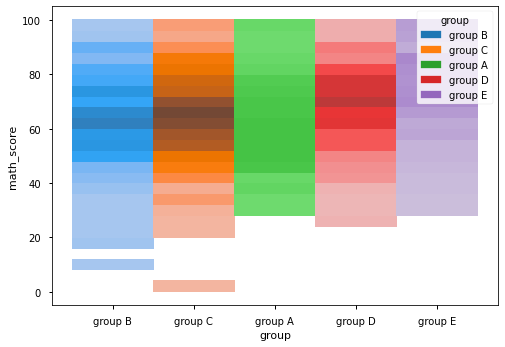

In [63]:
sns.histplot(x='group',y='math_score',data = data, hue = 'group')

In [52]:
def pretty_distribution_comparison(distributions_list, labels_list):
    
    sns.set(style='darkgrid')
    
    for idx, distribution in enumerate(distributions_list):
        fig = sns.kdeplot(distribution, shade = True)
        
    plt.legend(labels = labels_list)
    plt.xlabel('Math Score')
    plt.ylabel('Score Density')
    plt.title('Math Score Distributions by Tested Groups')
    plt.show()

In [53]:
math_A = data.math_score[data.group == 'group A']
math_B = data.math_score[data.group == 'group B']
math_C = data.math_score[data.group == 'group C']
math_D = data.math_score[data.group == 'group D']
math_E = data.math_score[data.group == 'group E']
math_list = [ math_A, math_B, math_C, math_D, math_E]
math_labels = [ 'math_A', 'math_B', 'math_C', 'math_D', 'math_E']

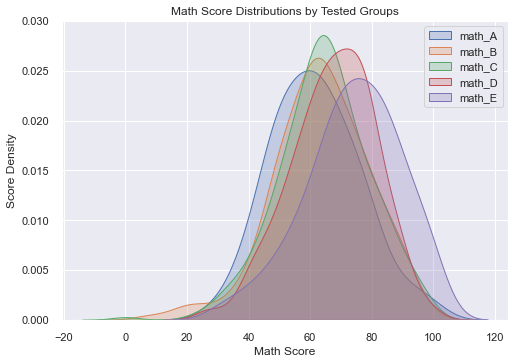

In [54]:
pretty_distribution_comparison(math_list, math_labels)

In [ ]:
def ridgeline( dataframe, score_col, group ):
    
    g = sns.FacetGrid( dataframe, row = group, hue = dataframe[dataframe['group'] == group][score_col],
                       score_type.mean(), aspect = 15, height = 0.75 )
    
    g.map( sns.kdeplot, score_col, bw_adjust = 1, clip_on = False, fill = True, alpha = 1, linewidth = 1.5 )
    g.map( sns.kdeplot, score_col, bw_adjust = 1, clip_on = False, color = 'w', lw = 2 )
    g.map( plt.axhline, y = 0, lw = 2, clip_on = False )
    
    for idx, ax in enumerate(g.axes.flat):
        ax.text(-15,0.02,dataframe.columns[idx],fontweight = 'bold', fontsize = 15, color=ax.lines[-1].get_color())
        
    g.fig.subplots_adjust(hspace=-0.3)
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom = True, left = True)
    
    
    plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
    plt.xlabel('Student Test Score', fontweight='bold', fontsize=15)
    subject = score_col.split('_')[0].capitalize()
    g.fig.suptitle(f'Test Score Distributions by Testing Group in {subject}',
               ha='right',
               fontsize=20,
               fontweight=20)

    plt.show()